In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("car_data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
final_data=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
final_data['current_year']=2021

In [14]:
final_data['no_year']=final_data['current_year']-final_data['Year']

In [15]:
final_data.drop(['Year','current_year'],axis=1,inplace=True)

In [16]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
final_data=pd.get_dummies(final_data,drop_first=True)

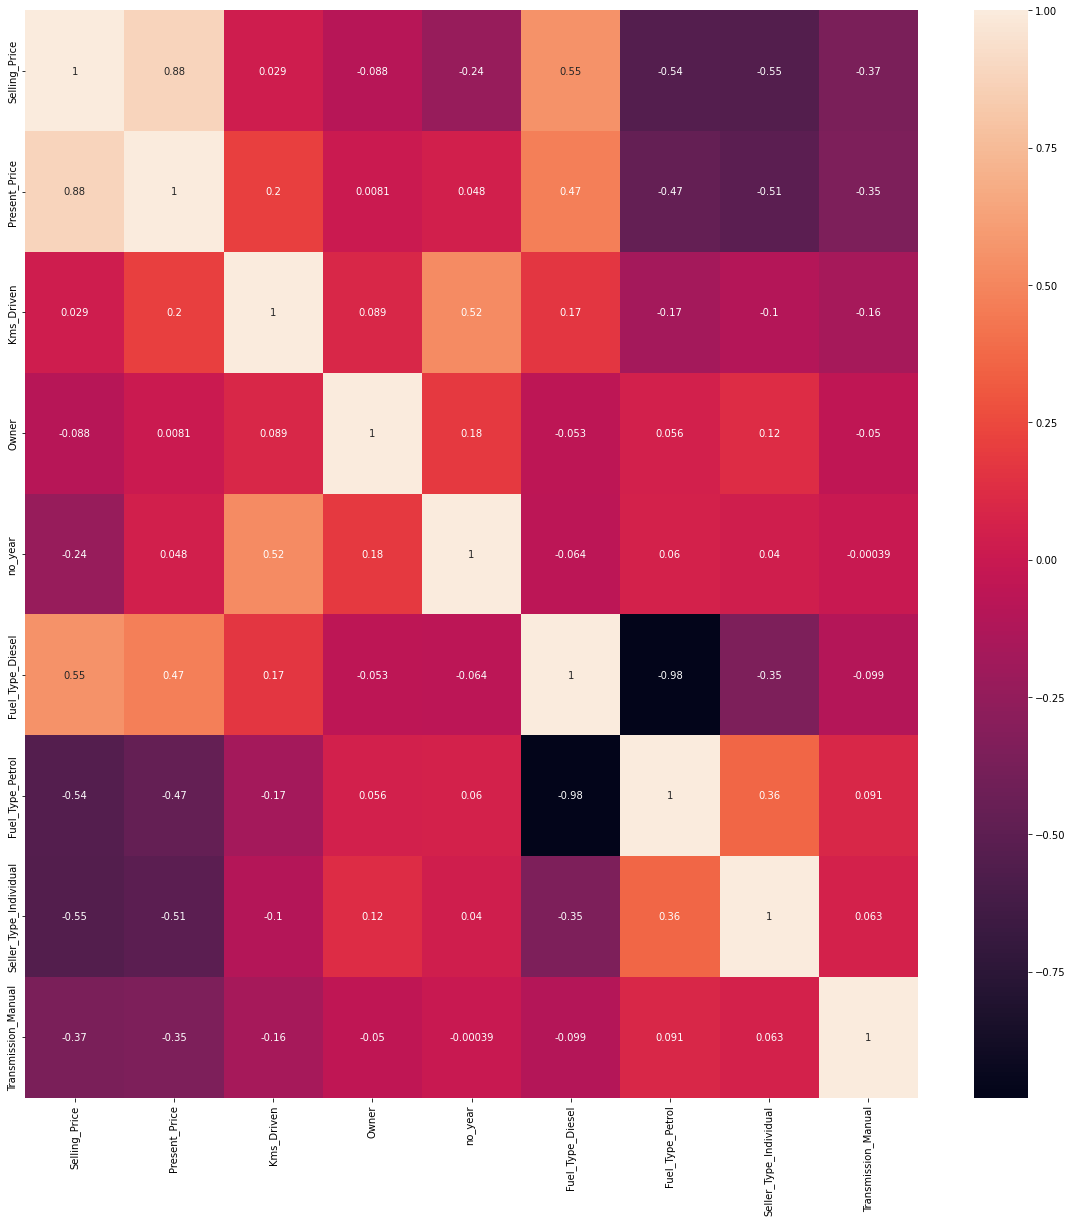

In [18]:
aa=final_data.corr()
features=aa.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_data[features].corr(),annot=True)

In [19]:
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.42204653 0.0408816  0.00110854 0.07883529 0.19438038 0.01578401
 0.12398083 0.12298282]


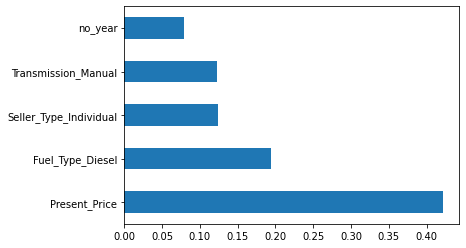

In [23]:
#plot graph of feature importance for better visualization
imp=pd.Series(model.feature_importances_,index=x.columns)
imp.nlargest(5).plot(kind='barh')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [26]:
#hypeparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
#randomized search CV

#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#no.of features consider at every split
max_features=['auto','sqrt']
#max no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max-depth.append(none)
#min. no. of samples required to split a node
min_samples_split=[2,5,10,15,100]
#min. no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
#create random grid
random_grid = {'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
#use random grid to search for best hyperparameters
#first create base model to tune
rf=RandomForestRegressor()

In [31]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                            scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [32]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
predictions=rf_random.predict(x_test)
predictions

array([ 6.29187,  5.30541,  0.78352,  5.56085,  6.4497 , 12.12103,
        5.21347, 17.03723,  6.47315,  1.00128,  5.76562,  0.83311,
        1.01322,  3.54895, 16.94269,  3.56726,  2.62524,  7.58288,
        4.08895,  0.34747,  4.45475,  1.02067,  6.97277,  1.01049,
        5.5503 ,  5.14867, 18.58206,  0.44352,  0.79867,  0.80019,
        3.20306,  4.89655,  0.52525,  0.55984,  0.48094,  4.39485,
       13.94405,  6.353  ,  3.15467,  0.58073,  5.18632,  7.1659 ,
        0.87145,  8.91764,  7.27435,  0.60291, 10.25468,  5.98571,
        0.35138,  5.17374,  5.70158,  5.09505,  3.19739,  1.08429,
        3.31247,  1.4489 ,  8.63549,  3.7468 ,  2.4766 ,  5.70698,
        2.83227])

c:\users\pc\anaconda3\envs\carpred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

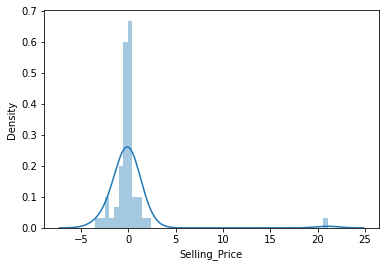

In [34]:
sns.distplot(y_test-predictions)

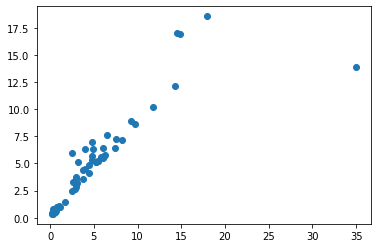

In [35]:
plt.scatter(y_test,predictions)

In [36]:
import pickle
#open file where you want to store the data
file=open('random_forest_regression_model.pkl','wb')

#dump info to that file
pickle.dump(rf_random,file)

In [37]:
model=pickle.load(open('random_forest_regression_model.pkl','rb'))